In [34]:
import numpy as np
import pandas as pd 
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [35]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(device)

cuda:0


In [36]:
train_data = np.array([            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 0, 0, 1, 0, 0, 0,             0, 0, 1, 1, 0, 0, 0,             0, 0, 0, 1, 0, 0, 0,             0, 0, 0, 1, 0, 0, 0,             0, 0, 0, 1, 0, 0, 0,             0, 0, 0, 1, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 1, 1, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 0, 0, 1, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 1, 0, 0,             0, 0, 0, 0, 1, 0, 0,             0, 0, 0, 0, 1, 0, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 1, 0, 0,             0, 0, 0, 1, 0, 0, 0,             0, 0, 1, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,             0, 1, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 0, 0],            [0, 0, 0, 0, 0, 0, 0,             0, 1, 1, 1, 1, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 0, 0, 0, 1, 0,             0, 1, 1, 1, 1, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 1, 0,             0, 0, 0, 0, 0, 0, 0]])
print(train_data.shape)
test_data = np.array([           [0, 0, 0, 0, 0, 0, 0,            0, 1, 1, 0, 1, 1, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 0, 0, 1, 0, 0, 0,            0, 0, 0, 0, 0, 0, 0,            0, 0, 0, 1, 0, 0, 0,            0, 0, 0, 1, 0, 0, 0,            0, 0, 0, 1, 0, 0, 0,            0, 0, 0, 1, 0, 0, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 1, 0,            0, 1, 0, 1, 1, 1, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 0, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 1, 0, 1, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 1, 1, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 1, 0, 0,            0, 0, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0,            0, 0, 0, 0, 1, 0, 0,            0, 0, 0, 0, 1, 0, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 1, 1, 1, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 0, 0, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 0, 1, 1, 1, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 1, 1, 1, 0, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 0, 1, 1, 1, 0,
            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 1, 0, 0,            0, 0, 0, 1, 0, 0, 0,            0, 0, 1, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 0, 0, 0, 0, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 0, 1, 1, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 0, 0,            0, 1, 1, 1, 1, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 0, 0],           [0, 0, 0, 0, 0, 0, 0,            0, 1, 1, 1, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 1, 0, 0, 0, 1, 0,            0, 0, 1, 1, 1, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 0, 1, 0,            0, 0, 0, 0, 0, 0, 0]])
print(test_data.shape)
classes = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

(10, 63)
(10, 63)


In [37]:
class NeuroNetwork:
    def __init__(self, hidden_layer=9, lr=0.3, itreation=1000, convergence=1e-5) -> None:
        self.lr = lr
        self.itreation = int(itreation)
        self.convergence = convergence
        self.hidden_layer = int(hidden_layer) 
    
    def sigmoid(self, x, theta):
        x = np.asarray(x)
        theta = np.asarray(theta)
        return 1/(1 + np.exp(-np.dot(theta.T, x)))
    
    def feedforward(self, x):
        l1 = self.sigmoid(x.T, self.theta0).T
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        l2 = self.sigmoid(l1.T, self.theta1)
        return l1, l2


    def cost_func(self, x, y):
        l2 = self.predict(x)
        loss = y * np.log(l2) + (1-y) * np.log(1-l2)
        return -np.mean(loss)
    
    def predict(self, x):
        _, prediction = self.feedforward(x)
        return prediction

    def learning(self, x ,y):
        nobs, ncols= x.shape
        self.theta0 = np.random.normal(0, 0.01, (ncols, self.hidden_layer))
        self.theta1 = np.random.normal(0, 0.01, (self.hidden_layer+1, 1))
        cost = self.cost_func(x, y)
        self.costs = []
        self.costs.append(cost)
        prev_cost = cost + self.convergence +1

        for i in range(self.itreation):
            l1, l2 = self.feedforward(x)
            # gradient
            # sigmoid: S'(x) = S(x)*(1-S(x))
            delta_l2 = (y - l2) * l2 * (1-l2)
            delta_l1 = delta_l2.T.dot(self.theta1.T)*l1*(1-l1)
            #update
            self.theta0 += self.lr/nobs * x.T.dot(delta_l1)[:, 1:]
            self.theta1 += self.lr/nobs * l1.T.dot(delta_l2.T)

            prev_cost = cost
            cost = self.cost_func(x, y)
            self.costs.append(cost)

            if(np.abs(prev_cost-cost) < self.convergence):
                break
    def plot_loss(self, j):
        # plt.figure(dpi=50)
        plt.subplot(5,2,j+1)
        plt.plot(self.costs)
        plt.title("Convergence of Loss classifying number {}".format(j))
        plt.xlabel("Itreation")
        plt.ylabel("Loss")

In [ ]:
hidden_units = 10
lr = 0.1
itreation = 30000
convergence = 1e-5

models = {}
for j in classes:
    model = NeuroNetwork(hidden_layer=hidden_units, lr=lr, itreation=itreation, convergence=convergence)
    classes_train = (classes == j)

    model.learning(train_data, classes_train)
    models[j] = model


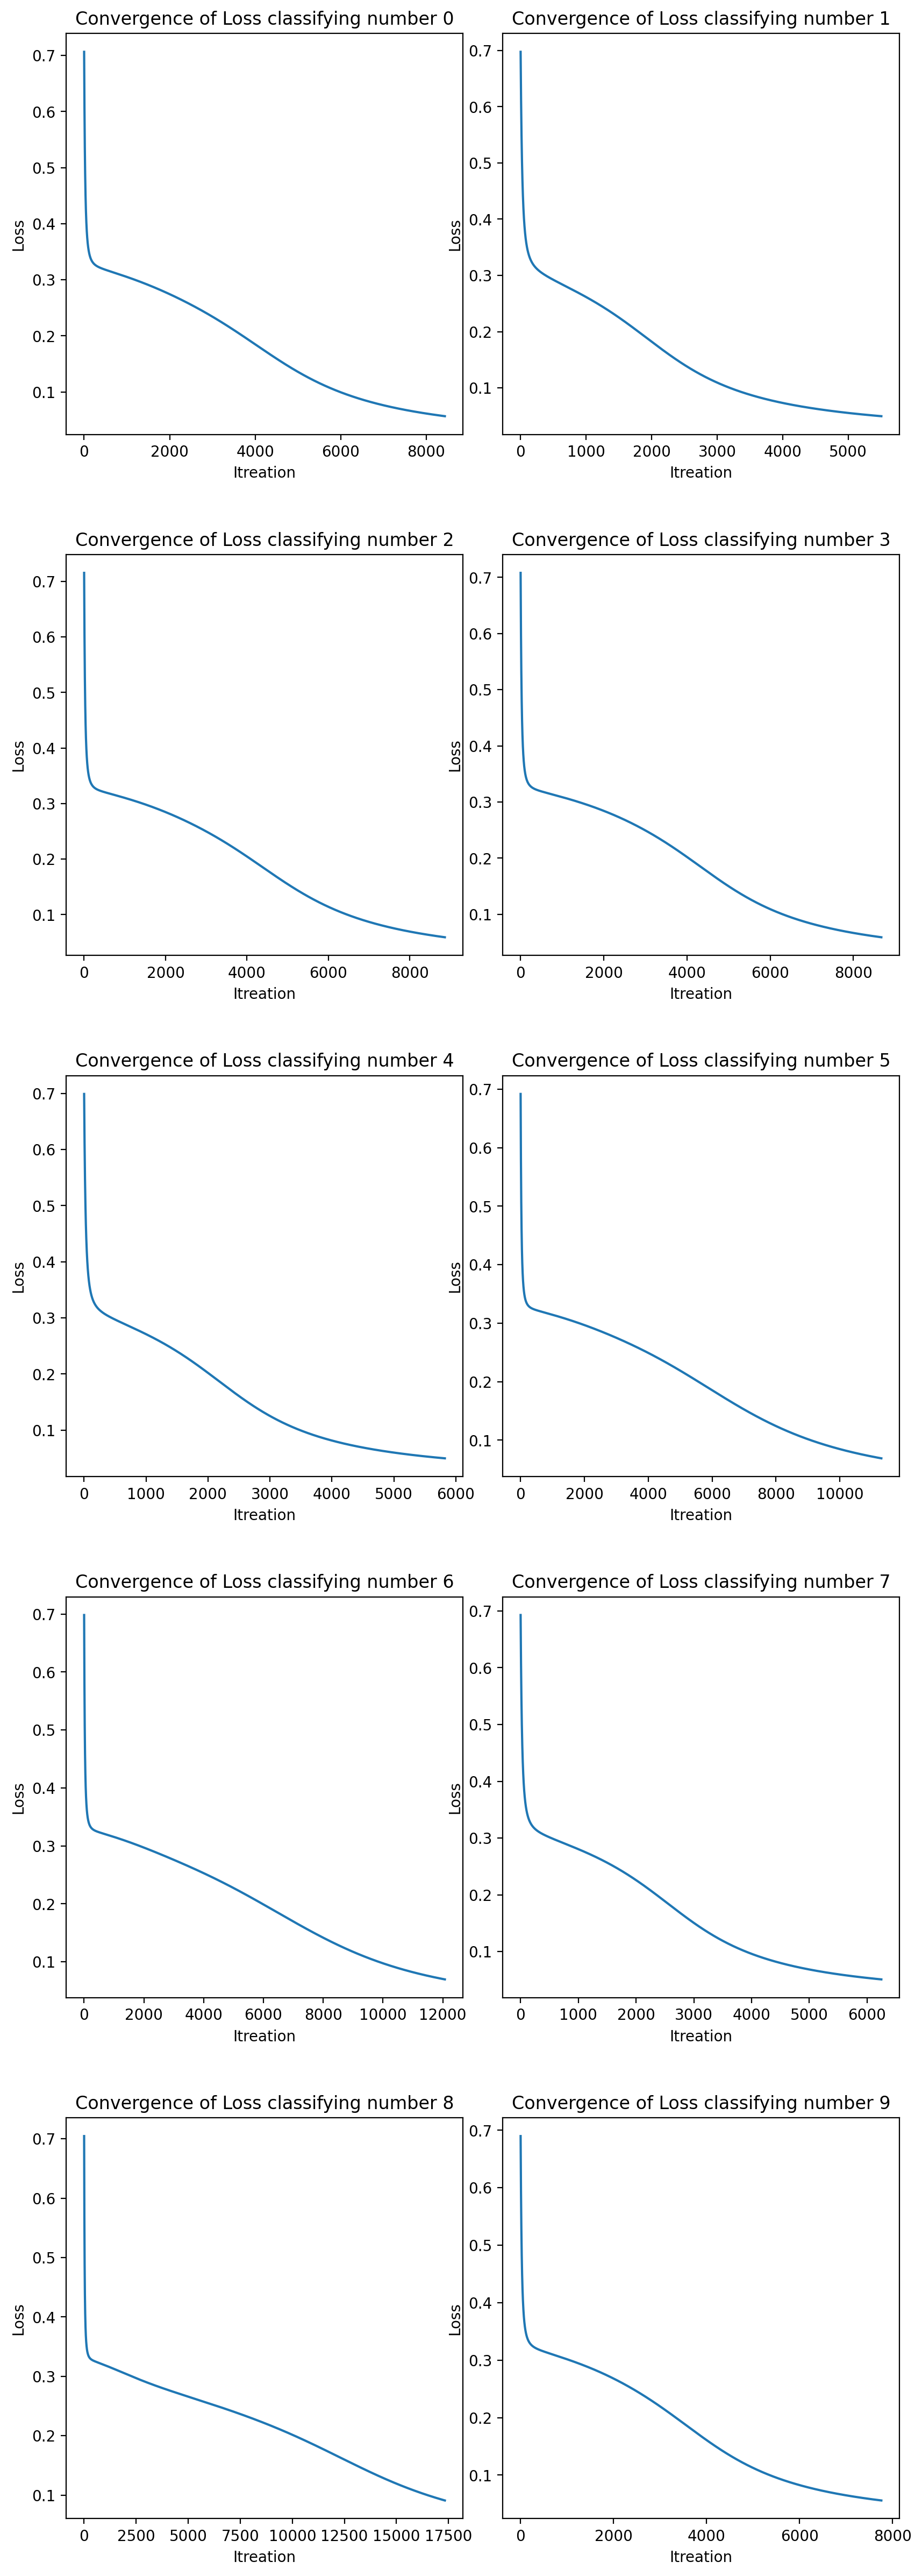

In [54]:

#predict
prob_of_test = pd.DataFrame(columns=[0,1,2,3,4,5,6,7,8,9])
plt.figure(figsize=(10,30),dpi=200)
for j in classes:
    predictions = models[j].predict(test_data)[0]
    prob_of_test[j] = predictions
    models[j].plot_loss(j)
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

In [39]:
outputs = prob_of_test.idxmax(axis=1)
print('output:\n', prob_of_test)
print('classification:\n')
print(list(outputs))

# plt.plot()


output:
           0         1         2         3         4         5         6  \
0  0.748352  0.025519  0.019985  0.027656  0.022785  0.022218  0.308479   
1  0.023262  0.735523  0.062792  0.097994  0.036412  0.083487  0.023444   
2  0.050397  0.044200  0.687479  0.082639  0.029439  0.002189  0.139132   
3  0.040857  0.041333  0.059041  0.792174  0.017777  0.056626  0.001690   
4  0.003972  0.044886  0.015325  0.008478  0.744266  0.059688  0.041442   
5  0.011310  0.052455  0.024726  0.020655  0.088749  0.658246  0.102344   
6  0.038188  0.042332  0.021145  0.005745  0.038044  0.113076  0.753592   
7  0.029903  0.057100  0.060101  0.041986  0.047192  0.001679  0.011582   
8  0.063941  0.026959  0.039847  0.011836  0.037076  0.024132  0.407802   
9  0.015019  0.018947  0.005603  0.143693  0.063414  0.031887  0.002928   

          7         8         9  
0  0.018617  0.073513  0.013945  
1  0.046496  0.005682  0.003461  
2  0.037913  0.002673  0.014060  
3  0.037233  0.061712  0.0376